In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import time
%matplotlib inline

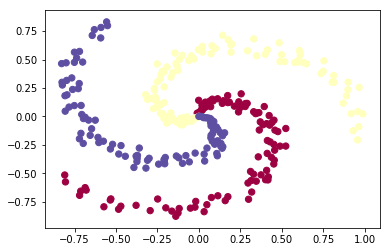

In [2]:
#Spiral Data
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

inputs = X
outputs = y

outputs = np.array(pd.get_dummies(outputs))

In [3]:
def sigmoid(x, derivative=False):
    sigma = 1/(1+np.exp(-x))
    if derivative:
        return sigma * (1-sigma)
    else:
        return sigma
    
def relu(x, derivative=False):
    
    if derivative:
        return 1. * (x > 0)
    else:
        return x * (x > 0)
    
def Identity(x, derivative=False):
    if derivative:
        return np.ones(x.shape)
    else:
        return x
    
def softmax(x):
    e_x = np.exp(x - np.max(x))
    summations = np.sum(e_x, axis=1)
    summations = summations.reshape(len(summations), 1)    
    return e_x / summations

In [4]:
#inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
#outputs = np.array([[0], [1], [1], [0]])

In [5]:
def graph(w1, w2):
    plt.figure()
    xx, yy = make_meshgrid(inputs[:, 0], inputs[:, 1])
    Z = np.c_[xx.ravel(), yy.ravel()]

    a1 = np.matmul(Z, w1)
    h1 = sigmoid(a1)
    
    a2 = np.matmul(h1, w2)
    Z = sigmoid(a2)

    Z = np.argmax(Z, axis=1)

    Z = Z.reshape(xx.shape)
    #Z = np.sqrt(xx**2 + yy**2)
    cp = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(inputs[:, 0], inputs[:, 1], c=np.argmax(outputs, axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    #plt.colorbar(cp)



Epoch: 0 - 0.7252297391495381 - 35%
Epoch: 1000 - 0.5221943880630824 - 57%
Epoch: 2000 - 0.24942630233616053 - 85%
Epoch: 3000 - 0.07808804344011795 - 98%
Epoch: 4000 - 0.06079536284688818 - 98%

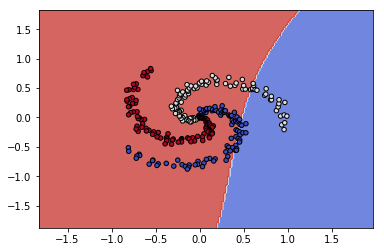

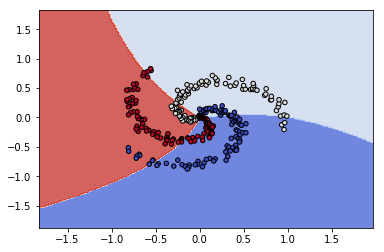

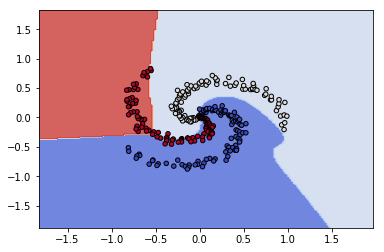

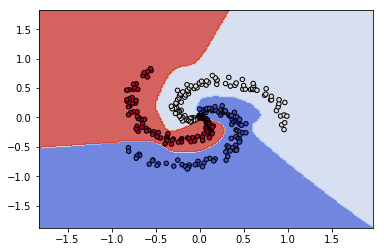

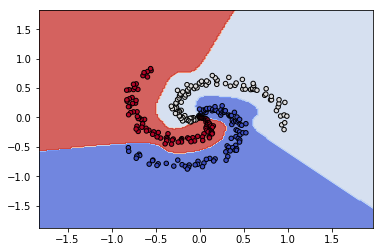

In [19]:
hidden_size = 190

w1 = 2*np.random.random((inputs.shape[1], hidden_size)) - 1
w2 = 2*np.random.random((hidden_size, outputs.shape[1])) - 1

learning_rate = 0.01
epochs = 5000
for i in range(epochs):
    
    a1 = np.matmul(inputs, w1)
    h1 = sigmoid(a1)
    
    a2 = np.matmul(h1, w2)
    h2 = sigmoid(a2)#sigmoid(a2)
    
    h2_error = h2 - outputs
    delta2 = h2_error * sigmoid(a2, derivative=True)
    
    h1_error = np.matmul(delta2, w2.T)

    delta1 = h1_error * sigmoid(a1, derivative=True)
    
    dW2 = np.matmul(h1.T, delta2)
    dW1 = np.matmul(inputs.T, delta1)
    
    w1 -= dW1 * learning_rate
    w2 -= dW2 * learning_rate
        
    mse = np.sum(h2_error ** 2) / len(inputs)
    
    classes = np.argmax(h2, axis=1)

    classes_true = np.argmax(outputs, axis=1)
    
    correct = len(np.where(classes == classes_true)[0])
    accuracy = (correct / len(classes) * 100)
    
    if i%1000 == 0:
        sys.stdout.write("\nEpoch: {} - {} - {}%".format(i, mse, round(accuracy)))
        graph(w1, w2)
    

##### 

In [15]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [16]:
def predict(X):
    a1 = np.matmul(X, w1)
    h1 = sigmoid(a1)
            
    a2 = np.matmul(h1, w2)
    h2 = sigmoid(a2)
    return h2

[[  1.00000000e+00   1.58416213e-12   3.13278992e-06]
 [  1.00000000e+00   1.42787266e-12   4.13098189e-06]
 [  1.00000000e+00   1.29709273e-12   5.37557299e-06]
 ..., 
 [  1.46183587e-12   1.00000000e+00   9.99978388e-01]
 [  1.28347387e-12   1.00000000e+00   9.99980102e-01]
 [  1.14496079e-12   1.00000000e+00   9.99981055e-01]]
[0 0 0 ..., 1 1 1]


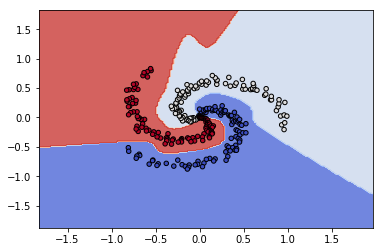

In [17]:
xx, yy = make_meshgrid(inputs[:, 0], inputs[:, 1])
Z = np.c_[xx.ravel(), yy.ravel()]

Z = predict(Z)

print (Z)

Z = np.argmax(Z, axis=1)

print (Z)

Z = Z.reshape(xx.shape)
#Z = np.sqrt(xx**2 + yy**2)
cp = plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(inputs[:, 0], inputs[:, 1], c=np.argmax(outputs, axis=1), cmap=plt.cm.coolwarm, s=20, edgecolors='k')
#plt.colorbar(cp)
